# Scikit-learnでTrain.pyを作ろう

## ライブラリをインポートしよう

In [2]:
# Numpy, pandasをインポート
import numpy as np
import pandas as pd

# データを開く
data_file = pd.read_csv('CreditData.csv', header=0,encoding="UTF-8")

data_file.head()

,貯金,信用履歴,年齢,家族構成,仕事,審査結果
0,5000000,クレジットローン履歴無し / 全てのクレジットローンは延滞無く完済,22,配偶者あり,パート,発行可
1,100000,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,社員,発行可
2,4000000,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,社員,発行不可
3,4000000,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,管理者/役員,発行不可
4,500000,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,パート,発行不可


In [3]:
data_file.describe()

,貯金,年齢
count,1.448000e+03,1448.000000
mean,4.843025e+06,48.556630
std,4.866182e+06,13.493333
min,0.000000e+00,22.000000
25%,5.000000e+05,38.000000
50%,4.000000e+06,50.000000
75%,8.000000e+06,60.000000
max,2.000000e+07,70.000000


## 正規化・標準化しよう

In [4]:
# 正規化
data_file["貯金"] = (data_file["貯金"] - data_file["貯金"].mean()) / data_file["貯金"].std()

data_file

,貯金,信用履歴,年齢,家族構成,仕事,審査結果
0,0.032258,クレジットローン履歴無し / 全てのクレジットローンは延滞無く完済,22,配偶者あり,パート,発行可
1,-0.974691,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,社員,発行可
2,-0.173242,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,社員,発行不可
3,-0.173242,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,管理者/役員,発行不可
4,-0.892491,ローンの残があるが現状遅延なく支払われている,22,配偶者あり,パート,発行不可
...,...,...,...,...,...,...
1443,-0.892491,ローンの残があるが現状遅延なく支払われている,70,配偶者なし,社員,発行不可
1444,-0.173242,ローンの残があるが現状遅延なく支払われている,70,配偶者なし,社員,発行不可
1445,-0.173242,ローンの残があるが現状遅延なく支払われている,70,配偶者なし,社員,発行不可
1446,1.059758,過去に遅延あり,70,配偶者なし,社員,発行可


## グループ分けしよう

In [5]:
# グループ分け
age_bins =[20,30,40,50,60,100]
age_label =['A20','A30','A40','A50','A60']
data_file['年齢'] = pd.cut(data_file['年齢'], bins=age_bins, labels=age_label)

data_file.head()

,貯金,信用履歴,年齢,家族構成,仕事,審査結果
0,0.032258,クレジットローン履歴無し / 全てのクレジットローンは延滞無く完済,A20,配偶者あり,パート,発行可
1,-0.974691,ローンの残があるが現状遅延なく支払われている,A20,配偶者あり,社員,発行可
2,-0.173242,ローンの残があるが現状遅延なく支払われている,A20,配偶者あり,社員,発行不可
3,-0.173242,ローンの残があるが現状遅延なく支払われている,A20,配偶者あり,管理者/役員,発行不可
4,-0.892491,ローンの残があるが現状遅延なく支払われている,A20,配偶者あり,パート,発行不可


## One-hot-encodingしよう

In [6]:
# One hot encoding
data_file = pd.get_dummies(data_file)

data_file.head()

,貯金,信用履歴_この銀行のクレジットローンは全て完済,信用履歴_クレジットローン履歴無し / 全てのクレジットローンは延滞無く完済,信用履歴_ローンの残があるが現状遅延なく支払われている,信用履歴_危険人物 / 他のクレジットローンが存在している (この銀行以外で),信用履歴_過去に遅延あり,年齢_A20,年齢_A30,年齢_A40,年齢_A50,年齢_A60,家族構成_配偶者あり,家族構成_配偶者なし,仕事_パート,仕事_無職,仕事_社員,仕事_管理者/役員,審査結果_発行不可,審査結果_発行可
0,0.032258,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
1,-0.974691,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
2,-0.173242,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,-0.173242,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
4,-0.892491,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0


## Numpyでデータを分けよう

In [7]:
# Numpy配列に変更
data_file = np.array(data_file)

# 入力データと正解ラベルに分割
data = data_file[:,:17]
label = data_file[:,17]

# サンプル数を計測
len(data)

data[2]

array([-0.17324153,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ])

## Scikit-learnで学習データとテストデータに分けよう


In [8]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(data,label, 
                                                                  random_state = 0, 
                                                                  stratify = label, 
                                                                  test_size = 0.3)


## Scikit-learnでSVMをインポートしよう

In [9]:
# Scikit-learnのSVMをインポート
from sklearn import svm

# SVMの読み込み
clf = svm.SVC(gamma='scale', C=30.,probability=True)
        # gammma:カーネル係数
        # C:正則化パラメータ


## 学習を実行しよう

In [10]:
# 70%のデータで学習実行
clf.fit(train_data, train_label)

SVC(C=30.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## クロスバリデーション

In [11]:
from sklearn.model_selection import cross_val_score

# training set を用いて学習
clf = clf.fit(train_data, train_label)

# test set を用いて評価
score = clf.score(test_data, test_label)
print('Test set score: {}'.format(score))

# 交差検証
scores = cross_val_score(clf, train_data, train_label,cv=5)

# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))

# スコアの平均値
print('Average score: {}'.format(np.mean(scores)))

Test set score: 0.8781609195402299
Cross-Validation scores: [0.87684729 0.87684729 0.87192118 0.86633663 0.83168317]
Average score: 0.8647271131053993


## テストデータで検証しよう

In [12]:
from sklearn import metrics

y_pre = clf.predict(test_data)
ac_score = metrics.accuracy_score(test_label, y_pre)
print('正解率{0:.1f}%'.format(ac_score * 100)) # :.1f 小数点桁数1桁

正解率87.8%


## 混同行列を確認しよう

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(test_label, y_pre))
print(confusion_matrix(test_label, y_pre))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87       210
         1.0       0.87      0.90      0.88       225

    accuracy                           0.88       435
   macro avg       0.88      0.88      0.88       435
weighted avg       0.88      0.88      0.88       435

[[180  30]
 [ 23 202]]


## ROCカーブとAUCスコアを確認しよう


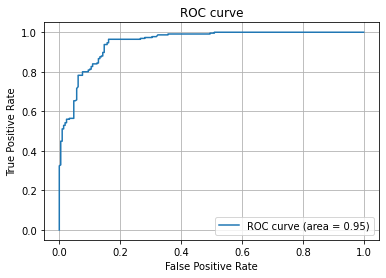

In [14]:
import matplotlib.pyplot as plt

# 各入力にスコアを算出
y_score = clf.predict_proba(test_data)[: , 1]

# FPR, TPR, 閾値 を算出
fpr, tpr, thresholds = metrics.roc_curve(test_label, y_score)

# AUCスコア
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr,label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## モデルを保存しよう

In [15]:
import pickle

# モデルを保存する
filename = "/content/drive/My Drive/Colab Notebooks/final_model.pkl"
pickle.dump(clf, open(filename, 'wb'))